In [1]:
import pandas as pd

In [2]:
# 导入数据
raw_data = pd.read_csv('wine.data',header=None)
raw_data.shape

(178, 14)

In [3]:
import numpy as np

In [4]:
# 预处理

data = raw_data
data_num = data.shape[0] # 样本数，178
indexes = np.random.permutation(data_num) # 将 0-177个数顺序打乱

# 随机划分
train_indexes = indexes[:int(data_num * 0.6)] # 训练集索引
val_indexes = indexes[int(data_num * 0.6):int(data_num * 0.8)] # 验证集索引
test_indexes = indexes[int(data_num * 0.8):] # 测试集索引

train_data = data.loc[train_indexes] # 训练集
val_data = data.loc[val_indexes] # 验证集
test_data = data.loc[test_indexes] # 测试集

# 三份数据合并
train_validation_data = pd.concat([train_data, val_data,test_data])
mean = train_validation_data.mean() # 均值
std = train_validation_data.std() # 标准差

# 归一化
train_data = (train_data - mean) / std  
val_data = (val_data - mean) / std
test_data = (test_data - mean) / std

# 转换为numpy的array类型
x_train = np.array(train_data.iloc[:,1:]) 
y_train = np.array(train_data.iloc[:,0])
x_val = np.array(val_data.iloc[:,1:])
y_val = np.array(val_data.iloc[:,0])
x_test = np.array(test_data.iloc[:,1:])
y_test = np.array(test_data.iloc[:,0])

In [5]:
x_train.shape

(106, 13)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
model = keras.Sequential([
    keras.Input(shape=(13,)), # 13个输入
    layers.Dense(16, activation='relu'), # 第一层16个节点
    layers.Dense(20, activation='relu'), # 第二层20个节点
    layers.Dense(10, activation='relu'),  # 第三层10个节点
    layers.Dense(1,) # 第四层1个节点，即一个输出
])

In [8]:
# 查看模型的信息
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 20)                340       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 指定训练配置（优化器、损失函数、评估指标）
model.compile(
    keras.optimizers.Adam(0.001), # keras.optimizers.SGD(learning_rate=0.01)
    loss=keras.losses.MeanSquaredError(), # 均方误差
    metrics=[keras.metrics.MeanAbsoluteError()] # 绝对误差
)

优化器（Optimizers）
优化器用于更新网络的权重，以最小化损失函数。常用的优化器有：

1.SGD（随机梯度下降）：
    keras.optimizers.SGD(learning_rate=0.01)
    最基础的优化算法，通过随机采样的方式来更新权重。
2.Adam：
    keras.optimizers.Adam(learning_rate=0.001)
    结合了AdaGrad和RMSprop的优点，自适应调整学习率，是目前最流行的优化器之一。
3.RMSprop：
    keras.optimizers.RMSprop(learning_rate=0.001)
    一种自适应学习率优化算法，适用于非平稳目标和有噪声的问题。
4.Adagrad：
    keras.optimizers.Adagrad(learning_rate=0.01)
    适用于处理稀疏数据，随着时间推移会自动减小学习率。
5.Adadelta：
    keras.optimizers.Adadelta(learning_rate=1.0)
    类似于Adagrad，但不需要设置初始学习率，并且能够自适应调整。

损失函数（Loss Functions）
损失函数用于评估模型的预测值与真实值之间的差异，目标是最小化这个差异。以下是一些常用的损失函数：

1.均方误差（MSE）：
    keras.losses.MeanSquaredError()
    常用于回归问题，计算预测值与真实值之间差的平方的平均值。
2.平均绝对误差（MAE）：
    keras.losses.MeanAbsoluteError()
    计算预测值与真实值之间差的绝对值的平均值，对异常值的敏感度低于MSE。
3.交叉熵损失（Cross-Entropy）：
    keras.losses.CategoricalCrossentropy()
    用于多分类问题，计算真实分布和预测分布之间的差异。
4.二元交叉熵损失（Binary Cross-Entropy）：
    keras.losses.BinaryCrossentropy()
    用于二分类问题，计算两个类别之间的交叉熵。

评估指标（Metrics）
评估指标用于评估模型的性能，通常在训练和测试阶段使用。常用的评估指标有：

1.准确率（Accuracy）：
    keras.metrics.Accuracy()
    计算分类正确的样本比例。
2.精确度（Precision）：
    keras.metrics.Precision()
    计算预测为正类别中实际为正类别的比例。
3.召回率（Recall）：
    keras.metrics.Recall()
    计算实际为正类别中预测为正类别的比例。
4.AUC（Area Under the ROC Curve）：
    keras.metrics.AUC()
    衡量模型分类能力的指标，特别是在二分类问题中。
5..均方误差（MSE） 和 平均绝对误差（MAE）：
    也可以作为评估指标使用，用于衡量回归模型的性能。

In [10]:
history = model.fit(
    x_train, y_train,
    batch_size = 64, # 将数据切分成大小为64的“批次”
    epochs = 500, # 训练迭代次数
    validation_data = (x_val, y_val), # 在每个epoch结束后，计算验证数据集的损失和指标（跟踪）
)           

Epoch 1/500
2/2 [==============================] - 1s 123ms/step - loss: 1.5017 - mean_absolute_error: 1.0408 - val_loss: 1.3710 - val_mean_absolute_error: 0.9355
Epoch 2/500
2/2 [==============================] - 0s 20ms/step - loss: 1.4228 - mean_absolute_error: 1.0127 - val_loss: 1.3017 - val_mean_absolute_error: 0.9066
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 1.3512 - mean_absolute_error: 0.9865 - val_loss: 1.2389 - val_mean_absolute_error: 0.8794
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 1.2900 - mean_absolute_error: 0.9620 - val_loss: 1.1822 - val_mean_absolute_error: 0.8552
Epoch 5/500
2/2 [==============================] - 0s 20ms/step - loss: 1.2247 - mean_absolute_error: 0.9367 - val_loss: 1.1310 - val_mean_absolute_error: 0.8324
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 1.1750 - mean_absolute_error: 0.9143 - val_loss: 1.0828 - val_mean_absolute_error: 0.8102
Epoch 7/500
2/2 [==========

2/2 [==============================] - 0s 19ms/step - loss: 0.2242 - mean_absolute_error: 0.3497 - val_loss: 0.1510 - val_mean_absolute_error: 0.3322
Epoch 52/500
2/2 [==============================] - 0s 23ms/step - loss: 0.2189 - mean_absolute_error: 0.3430 - val_loss: 0.1489 - val_mean_absolute_error: 0.3272
Epoch 53/500
2/2 [==============================] - 0s 19ms/step - loss: 0.2142 - mean_absolute_error: 0.3373 - val_loss: 0.1468 - val_mean_absolute_error: 0.3225
Epoch 54/500
2/2 [==============================] - 0s 20ms/step - loss: 0.2094 - mean_absolute_error: 0.3328 - val_loss: 0.1451 - val_mean_absolute_error: 0.3187
Epoch 55/500
2/2 [==============================] - 0s 18ms/step - loss: 0.2052 - mean_absolute_error: 0.3286 - val_loss: 0.1436 - val_mean_absolute_error: 0.3154
Epoch 56/500
2/2 [==============================] - 0s 20ms/step - loss: 0.2005 - mean_absolute_error: 0.3241 - val_loss: 0.1421 - val_mean_absolute_error: 0.3124
Epoch 57/500
2/2 [=================

2/2 [==============================] - 0s 19ms/step - loss: 0.0655 - mean_absolute_error: 0.1971 - val_loss: 0.1250 - val_mean_absolute_error: 0.2773
Epoch 102/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0637 - mean_absolute_error: 0.1954 - val_loss: 0.1246 - val_mean_absolute_error: 0.2767
Epoch 103/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0622 - mean_absolute_error: 0.1936 - val_loss: 0.1242 - val_mean_absolute_error: 0.2763
Epoch 104/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0606 - mean_absolute_error: 0.1916 - val_loss: 0.1238 - val_mean_absolute_error: 0.2758
Epoch 105/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0593 - mean_absolute_error: 0.1899 - val_loss: 0.1233 - val_mean_absolute_error: 0.2752
Epoch 106/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0581 - mean_absolute_error: 0.1884 - val_loss: 0.1227 - val_mean_absolute_error: 0.2746
Epoch 107/500
2/2 [===========

2/2 [==============================] - 0s 19ms/step - loss: 0.0249 - mean_absolute_error: 0.1261 - val_loss: 0.1132 - val_mean_absolute_error: 0.2562
Epoch 152/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0244 - mean_absolute_error: 0.1253 - val_loss: 0.1132 - val_mean_absolute_error: 0.2559
Epoch 153/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0240 - mean_absolute_error: 0.1245 - val_loss: 0.1131 - val_mean_absolute_error: 0.2555
Epoch 154/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0235 - mean_absolute_error: 0.1230 - val_loss: 0.1130 - val_mean_absolute_error: 0.2550
Epoch 155/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0231 - mean_absolute_error: 0.1217 - val_loss: 0.1130 - val_mean_absolute_error: 0.2548
Epoch 156/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.1208 - val_loss: 0.1133 - val_mean_absolute_error: 0.2548
Epoch 157/500
2/2 [===========

2/2 [==============================] - 0s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0889 - val_loss: 0.1208 - val_mean_absolute_error: 0.2523
Epoch 202/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0883 - val_loss: 0.1211 - val_mean_absolute_error: 0.2523
Epoch 203/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0127 - mean_absolute_error: 0.0879 - val_loss: 0.1215 - val_mean_absolute_error: 0.2523
Epoch 204/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0126 - mean_absolute_error: 0.0878 - val_loss: 0.1217 - val_mean_absolute_error: 0.2522
Epoch 205/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0872 - val_loss: 0.1217 - val_mean_absolute_error: 0.2521
Epoch 206/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0866 - val_loss: 0.1220 - val_mean_absolute_error: 0.2521
Epoch 207/500
2/2 [===========

2/2 [==============================] - 0s 18ms/step - loss: 0.0075 - mean_absolute_error: 0.0668 - val_loss: 0.1279 - val_mean_absolute_error: 0.2477
Epoch 252/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0667 - val_loss: 0.1279 - val_mean_absolute_error: 0.2476
Epoch 253/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0662 - val_loss: 0.1280 - val_mean_absolute_error: 0.2479
Epoch 254/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0073 - mean_absolute_error: 0.0655 - val_loss: 0.1282 - val_mean_absolute_error: 0.2482
Epoch 255/500
2/2 [==============================] - 0s 22ms/step - loss: 0.0072 - mean_absolute_error: 0.0649 - val_loss: 0.1284 - val_mean_absolute_error: 0.2485
Epoch 256/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0072 - mean_absolute_error: 0.0646 - val_loss: 0.1285 - val_mean_absolute_error: 0.2486
Epoch 257/500
2/2 [===========

2/2 [==============================] - 0s 20ms/step - loss: 0.0047 - mean_absolute_error: 0.0512 - val_loss: 0.1319 - val_mean_absolute_error: 0.2486
Epoch 302/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0510 - val_loss: 0.1319 - val_mean_absolute_error: 0.2484
Epoch 303/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0046 - mean_absolute_error: 0.0507 - val_loss: 0.1319 - val_mean_absolute_error: 0.2482
Epoch 304/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0046 - mean_absolute_error: 0.0504 - val_loss: 0.1320 - val_mean_absolute_error: 0.2478
Epoch 305/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0045 - mean_absolute_error: 0.0502 - val_loss: 0.1321 - val_mean_absolute_error: 0.2475
Epoch 306/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0500 - val_loss: 0.1322 - val_mean_absolute_error: 0.2472
Epoch 307/500
2/2 [===========

2/2 [==============================] - 0s 19ms/step - loss: 0.0030 - mean_absolute_error: 0.0397 - val_loss: 0.1355 - val_mean_absolute_error: 0.2460
Epoch 352/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0030 - mean_absolute_error: 0.0396 - val_loss: 0.1357 - val_mean_absolute_error: 0.2455
Epoch 353/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0030 - mean_absolute_error: 0.0395 - val_loss: 0.1359 - val_mean_absolute_error: 0.2456
Epoch 354/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0030 - mean_absolute_error: 0.0393 - val_loss: 0.1360 - val_mean_absolute_error: 0.2458
Epoch 355/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0029 - mean_absolute_error: 0.0390 - val_loss: 0.1360 - val_mean_absolute_error: 0.2462
Epoch 356/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0029 - mean_absolute_error: 0.0388 - val_loss: 0.1361 - val_mean_absolute_error: 0.2462
Epoch 357/500
2/2 [===========

2/2 [==============================] - 0s 19ms/step - loss: 0.0021 - mean_absolute_error: 0.0321 - val_loss: 0.1389 - val_mean_absolute_error: 0.2448
Epoch 402/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0021 - mean_absolute_error: 0.0318 - val_loss: 0.1389 - val_mean_absolute_error: 0.2451
Epoch 403/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0020 - mean_absolute_error: 0.0316 - val_loss: 0.1389 - val_mean_absolute_error: 0.2455
Epoch 404/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0020 - mean_absolute_error: 0.0315 - val_loss: 0.1389 - val_mean_absolute_error: 0.2460
Epoch 405/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0020 - mean_absolute_error: 0.0314 - val_loss: 0.1390 - val_mean_absolute_error: 0.2461
Epoch 406/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0020 - mean_absolute_error: 0.0313 - val_loss: 0.1392 - val_mean_absolute_error: 0.2456
Epoch 407/500
2/2 [===========

2/2 [==============================] - 0s 20ms/step - loss: 0.0015 - mean_absolute_error: 0.0261 - val_loss: 0.1407 - val_mean_absolute_error: 0.2441
Epoch 452/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0015 - mean_absolute_error: 0.0261 - val_loss: 0.1408 - val_mean_absolute_error: 0.2439
Epoch 453/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0014 - mean_absolute_error: 0.0262 - val_loss: 0.1408 - val_mean_absolute_error: 0.2437
Epoch 454/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0014 - mean_absolute_error: 0.0260 - val_loss: 0.1408 - val_mean_absolute_error: 0.2436
Epoch 455/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0014 - mean_absolute_error: 0.0259 - val_loss: 0.1408 - val_mean_absolute_error: 0.2437
Epoch 456/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0014 - mean_absolute_error: 0.0258 - val_loss: 0.1407 - val_mean_absolute_error: 0.2436
Epoch 457/500
2/2 [===========

注意点：
1.较小的批次大小可以提供更好的泛化能力，但可能会增加训练时间。较大的批次大小可以加快训练速度，但可能会影响模型的收敛性和泛化能力。
2.更多的迭代次数可以提高模型的性能，但同时也增加了过拟合的风险。
3.validation_data = (x_val, y_val)在每个epoch结束后评估模型的性能。这可以帮助监控模型在未见过的数据上的表现，并用于早期停止以防止过拟合。

In [11]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

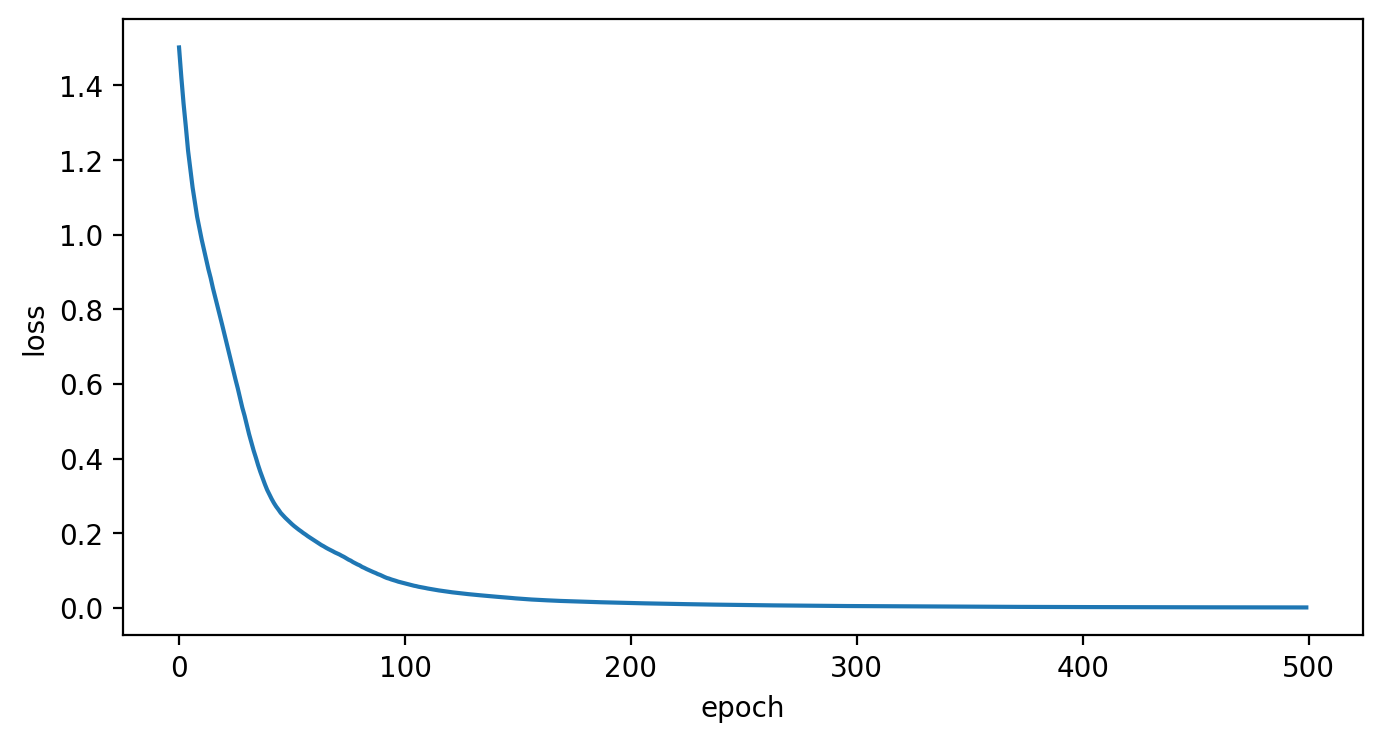

In [13]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(1,1,1)

loss = history.history['loss']
n = len(loss)
ax.plot(np.arange(n),loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

In [14]:
y_test

array([ 1.36999976,  0.07973544,  0.07973544,  0.07973544, -1.21052889,
        1.36999976,  1.36999976,  1.36999976,  0.07973544, -1.21052889,
        0.07973544,  0.07973544,  0.07973544,  1.36999976,  0.07973544,
        1.36999976,  1.36999976, -1.21052889,  1.36999976, -1.21052889,
        0.07973544,  0.07973544,  0.07973544,  0.07973544,  0.07973544,
        0.07973544,  0.07973544,  1.36999976,  1.36999976,  1.36999976,
        1.36999976,  0.07973544,  0.07973544,  0.07973544, -1.21052889,
        1.36999976])

In [15]:
model.predict(x_test)

2/2 [==============================] - 0s 997us/step


array([[ 1.3097794 ],
       [-0.11435763],
       [ 0.03241803],
       [-0.4697863 ],
       [-1.4123721 ],
       [ 1.3309529 ],
       [ 1.0996437 ],
       [ 1.3774843 ],
       [ 0.12505338],
       [-0.7172443 ],
       [-0.5737229 ],
       [ 0.96090466],
       [-0.37192038],
       [ 1.5858364 ],
       [ 0.492186  ],
       [ 1.1758971 ],
       [ 1.5438256 ],
       [-1.3434718 ],
       [ 1.3764768 ],
       [-1.1247327 ],
       [ 0.22020644],
       [ 0.05861323],
       [ 0.23261294],
       [ 0.29790226],
       [ 0.4283284 ],
       [-0.5424944 ],
       [ 0.23173243],
       [ 2.0655499 ],
       [ 1.3663027 ],
       [ 1.4061031 ],
       [ 1.4716487 ],
       [-0.24767506],
       [-0.37147585],
       [ 0.06757634],
       [-1.2551506 ],
       [ 1.3436546 ]], dtype=float32)

In [19]:
# 评估模型
results = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1071 - mean_absolute_error: 0.2353
